# Unsupervised Learning

Some suggested libraries that can help you:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Visualization

Alice and Bob, your colleagues from the astrophysics department, have given you a collection of astronomical data\[1\] describing exoplanets in different star systems. Each exoplanet is described by the distance from its orbiting star in AU (astronomical units), its mass (as multiples of the Earth), and the degree of light reflection (as an albedo integer). You input the data in a list of dictionaries.

In [3]:
data = [{'name': 'HD 209458 b', 'AU':2, 'mass':3, 'albedo':7},
       {'name': 'HD 189733 b', 'AU':5, 'mass':3, 'albedo':3},
       {'name': '51 Pegasi b', 'AU':7, 'mass':2, 'albedo':5},
       {'name': 'PSR B1257+12 B', 'AU':3, 'mass':5, 'albedo':6},
       {'name': 'PSR B1257+12 C', 'AU':5, 'mass':4, 'albedo':5},
       {'name': 'OGLE-TR-56 b', 'AU':7, 'mass':4, 'albedo':3},
       {'name': 'Fomalhaut b', 'AU':3, 'mass':3, 'albedo':8},
       {'name': '2M1207 b', 'AU':4, 'mass':3, 'albedo':7}]

**Transform the data into a pandas dataframe (or a different way you like to view your data) and print it out.**

In [4]:
data_frame = pd.DataFrame(data)
print(data_frame)

             name  AU  mass  albedo
0     HD 209458 b   2     3       7
1     HD 189733 b   5     3       3
2     51 Pegasi b   7     2       5
3  PSR B1257+12 B   3     5       6
4  PSR B1257+12 C   5     4       5
5    OGLE-TR-56 b   7     4       3
6     Fomalhaut b   3     3       8
7        2M1207 b   4     3       7


Some of these data (about half) have been collected using the *transit detection method* and others (about half) using an *infrared detection methods*. Alice and Bob know that these two methods are sensitive to exoplanets with different features, but they do not know which sample has been collected with which method.

Alice argues that looking at *AU* and *albedo* may help them infer which observations were performed with which techniques; Bob holds that looking at *AU* and *mass* may provide a better perspective to group the exoplanets by their discovery method.

**Plot the data first according to Alice's hypothesis and then Bob's hypothesis. Which hypothesis seems more likely?**

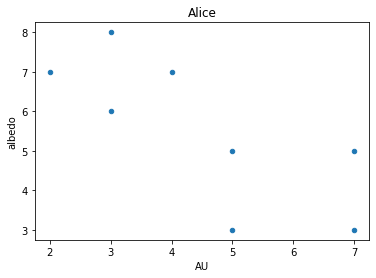

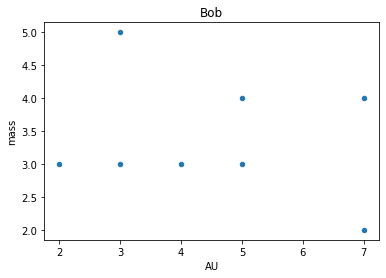

In [12]:
data_frame.plot.scatter("AU", "albedo", title="Alice")
data_frame.plot.scatter("AU", "mass", title="Bob")

## K-means

To give more grounding to your conclusions, you decide to run the *k-means algorithm* on your data using two clusters, one for each detection method. Let us call one cluster the BLUE cluster, and the other one the RED cluster.

**Run three iterations of k-means (assignment, recomputation of the centroids) on Alice's and Bob's data.**

### Assignment helper function
First, define a helper function for the *assignment step*. We want the function to satisfy the following requirements:
- The input are the coordinate of the BLUE cluster, the coordinate of the RED cluster, and the datapoints.
- The ouptut is a binary array, 0 denoting an assignment to the BLUE cluster and 1 denoting the assignment to the RED cluster.
- In the assignment phase, use as a *distance function* the *Manhattan distance* $D_{Man} \left[x_i,x_j\right]$, that gives you the number of straight segments necessary to get from one point to the other (see example in note \[2\]). You can implement your own *Manhattan distance* function or use *sklearn.metrics.pairwise.manhattan_distances()* function.
- If a point is the same distance from the center of both clusters, assign it to the BLUE cluster.

In [14]:
from sklearn.metrics.pairwise import manhattan_distances as md

In [175]:
def assignment(blu_cluster,red_cluster,data, verbose=False):
    # md applies manhattan distance
    # It also really likes a certain format
    # Not sure why
    blu_dist = md(blu_cluster.reshape(1,-1), data)
    red_dist = md(red_cluster.reshape(1,-1), data)
    if verbose:
        print(blu_dist, red_dist, sep="\n")

    # Assigns to 1 if closer to red, to 0 otherwise
    # Again, md likes a certain format and we are removing it now
    return np.squeeze(blu_dist <= red_dist)

### Recomputation helper function

Now define a helper function for the *recomputation step*. We want the function to satisfy the following requirements:
- The input are datapoints in the BLUE cluster and the datapoints in the RED cluster.
- The ouptuts are the coordinates of the new BLUE centroid and the coordinates of the RED centroid.
- In the recomputation of the centroids, round the values off to the nearest integer, e.g. $5.3 \rightarrow 5$, $2.5 \rightarrow 3$, $3.8 \rightarrow 4$.

In [60]:
def recomputation(blu_datapoints,red_datapoints, verbose=False):
    # np.rint rounds to nearest integer
    blu_centroid = (np.rint(np.array(blu_datapoints.mean())))
    red_centroid = (np.rint(np.array(red_datapoints.mean())))
    if verbose:
        print(blu_centroid, red_centroid, sep="\n")
    return blu_centroid, red_centroid

In [7]:
def data_presentation(blu_clust, red_clust, assignment_array, data, user, show=True):
    if user == "Alice":
        y_axis = "albedo"
    elif user == "Bob":
        y_axis = "mass"

    plt.scatter(data[ assignment_array].loc[:,['AU']], data[ assignment_array].loc[:,[y_axis]],s=50,c='red')
    plt.scatter(data[~assignment_array].loc[:,['AU']], data[~assignment_array].loc[:,[y_axis]],s=50,c='blue')
    plt.scatter(*blu_clust,s=50,c='blue',marker='x')
    plt.scatter(*red_clust,s=50,c='red', marker='x')
    if show:
        plt.show()

range(1, 5)
range(1, 5)
range(1, 5, 2)


### K-means on Alice's data

Start the algorithm initializing the BLUE cluster at (3,2), and the RED cluster at (8,3). Then run through 3 iterations of assignment and recomputation, using Alice's data. Plot the data, centroids and indicate which cluster each datapoint belongs to for each iteration. Hint: It is practical to color each datapoint according to which cluster it currently belongs to.

[[6. 3. 7. 4. 5. 5. 6. 6.]]
[[10.  3.  3.  8.  5.  1. 10.  8.]]


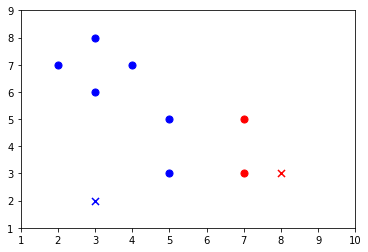

blu [3 2]


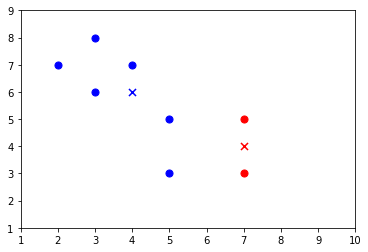

[[3. 4. 4. 1. 2. 6. 3. 1.]]
[[8. 3. 1. 6. 3. 1. 8. 6.]]


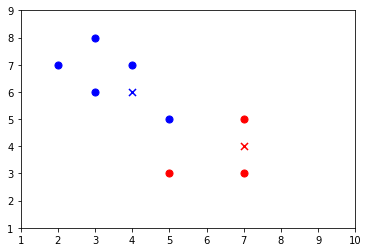

blu [4. 6.]


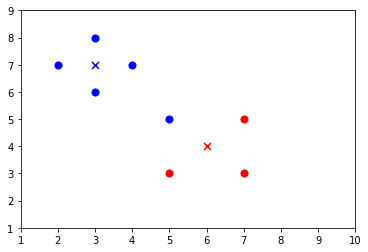

[[1. 6. 6. 1. 4. 8. 1. 1.]]
[[7. 2. 2. 5. 2. 2. 7. 5.]]


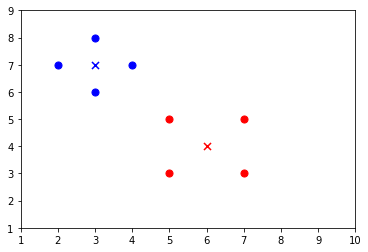

blu [3. 7.]


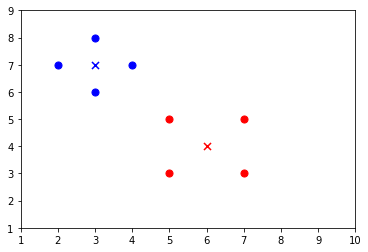

In [139]:
blu_clust = np.array([3, 2])
red_clust = np.array([8, 3])

data_al = data_frame.loc[:,['AU','albedo']]

n_runs = 3
for i in range(n_runs):
    assignment_al = assignment(
        blu_clust, 
        red_clust, 
        data_al, 
        verbose=True
    )
    data_presentation(blu_clust, red_clust, assignment_al, data_al, "Alice")
    
    blu_points = data_al[ assignment_al]
    red_points = data_al[~assignment_al]
    blu_clust, red_clust = recomputation(
        blu_points, 
        red_points
    )
    data_presentation(blu_clust, red_clust, assignment_al, data_al, "Alice")

### K-means on Bob's data

Repeat the above, on Bob's data, again initializing the BLUE cluster at (3,2), and the RED cluster at (8,3).

[[2. 3. 4. 3. 4. 6. 1. 2.]]
[[6. 3. 2. 7. 4. 2. 5. 4.]]


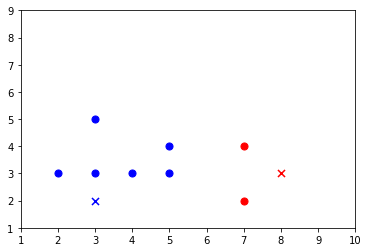

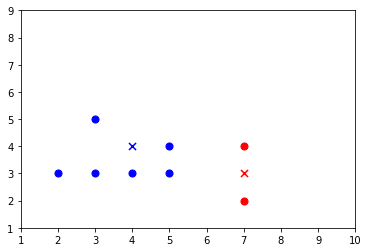

[[3. 2. 5. 2. 1. 3. 2. 1.]]
[[5. 2. 1. 6. 3. 1. 4. 3.]]


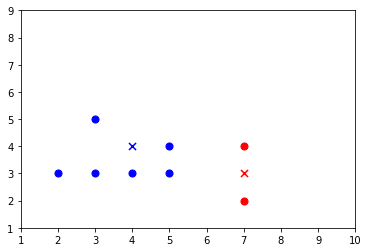

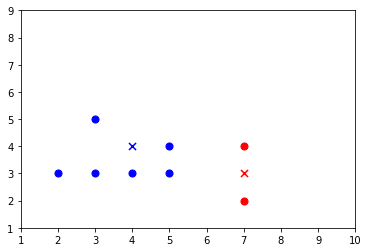

In [118]:
blu_clust = np.array([3, 2])
red_clust = np.array([8, 3])

data_bo = data_frame.loc[:,['AU','mass']]

n_runs = 2
for i in range(n_runs):
    assignment_bo = assignment(
        blu_clust, 
        red_clust, 
        data_bo, 
        verbose=True
    )
    data_presentation(blu_clust, red_clust, assignment_bo, data_bo, "Bob")

    blu_points = data_bo[ assignment_bo]
    red_points = data_bo[~assignment_bo]
    blu_clust, red_clust = recomputation(
        blu_points, 
        red_points
    )
    data_presentation(blu_clust, red_clust, assignment_bo, data_bo, "Bob")

**Do your results agree with your conclusions from the visualization exercise?**

## Quantitative Evaluation

Bob and Alice look very interested in your results: it seems that clustering based on a given pair of features is better than clustering on another set of features. However, they are uneasy accepting a solution based on an intuitive visualization. They ask if your results may be given a quantitative explanation.

First, write down the final centroid computed under Alice's and Bob's hypotheses.

In [119]:
final_alice_clusters = np.array([[[3,7]],[[6,4]]])
final_bob_clusters   = np.array([[[4,4]],[[7,3]]])

You think that an easy way would be to compute the *separation* between the clusters, that is computing the distance between the blue point that is closest to the red cluster and the red point that is closer to the blue cluster. This measure would quantify the gap between the two clusters.

**Compute the separation for the clustering of Alice's data and Bob's data.**

In [120]:
# Solution: Read from the graph
alice_blue_closest_to_red = [[4,7]]
alice_red_closest_to_blue = [[5,5]]
print("Alice:", md(alice_blue_closest_to_red,alice_red_closest_to_blue))
bob_blue_closest_to_red =   [[5,4]]
bob_red_closest_to_blue =   [[7,4]]
print("Bob:",   md(bob_blue_closest_to_red,bob_red_closest_to_blue))

Alice: [[3.]]
Bob: [[2.]]


This measure would quantify the gap between the two clusters.

**What would you conclude from the computation of cluster separation?**

Yet, you feel this measure is not very robust.

**What problem could you imagine having when using cluster separation?**

You ask your colleagues, and Yoshua explains to you that there are two important measures to evaluate clustering: the *inter-cluster distance*, measuring how separate two clusters are, and the *intra-cluster distance*, measuring how compact a cluster is.

**Compute the inter-cluster distance for the clustering of Alice's data and Bob's data (do not round to integers).**

To compute inter-cluster distance simply compute the distance between the centroid of the red and blue cluster: $ D_{inter} \left[ c_{blue}, c_{red} \right] = D_{Man} \left[ t_{blue}, t_{red} \right]$, where $c$ is a cluster and $t$ is a centroid.

In [121]:
alice_inter = md(*final_alice_clusters)
bob_inter   = md(*final_bob_clusters)
print(f"""
Alice: {alice_inter}
Bob:   {bob_inter}
""")


Alice: [[6.]]
Bob:   [[4.]]



**Compute the intra-cluster distance for the clustering of Alice's data and Bob's data (do not round to integers).**

Differently from the inter-cluster distance, the intra-cluster must be computed for each cluster individually. For each cluster, red or blue, compute the average distance of all the cluster points from the cluster center. For the blue cluster: $ D_{intra} \left[ c_{blue} \right] = \frac{1}{N_{blue}}\sum_{x\in c_{blue}}D\left[x,t_{blue}\right]$; similarly for the red cluster. Average then the intra-cluster distance of the blue and red cluster to get the overall intra-cluster distance for Alice and Bob: $\frac{1}{2} \left( D_{intra} \left[ c_{blue} \right] + D_{intra} \left[ c_{red} \right]\right)$.

In [122]:
assignment_al = assignment(*final_alice_clusters, data_al)

blu_points = data_al[ assignment_al]
red_points = data_al[~assignment_al]

intra_blu = md(final_alice_clusters[0],blu_points).mean()
intra_red = md(final_alice_clusters[1],red_points).mean()

intra_avg_al = (intra_blu + intra_red)/2

print(intra_avg_al)

1.5


In [123]:
assignment_bo = assignment(*final_bob_clusters, data_bo)

blu_points = data_bo[ assignment_bo]
red_points = data_bo[~assignment_bo]

intra_blu = md(final_bob_clusters[0],blu_points).mean()
intra_red = md(final_bob_clusters[1],red_points).mean()

intra_avg_bo = (intra_blu + intra_red)/2

print(intra_avg_bo)

1.4166666666666665


A good cluster is a cluster that clumps its point tightly close to each other, and that is far removed from other clusters. It is natural to assess the goodness of your clustering as the ratio between inter-cluster distance (which you want to be big) and intra-cluster distance (which you want to be small). 

**Compute the ratio of inter-cluster distance and intra-cluster distance for the clustering of Alice's data and Bob's data (do not round to integers). How does this confirm/reject your previous conclusions?**

In [124]:
print("Alice ratio:", alice_inter/intra_avg_al)
print("Bob ratio:  ", bob_inter / intra_avg_bo)

Alice ratio: [[4.]]
Bob ratio:   [[2.82352941]]


## Clustering new data

Alice and Bob are happy with your solution, and decide to adopt the clustering you argued being the best one. From now on, we will use only the clustering that you proved being the best. Now new data has come in:

In [125]:
newdata = [{'name': 'Beta Pictoris c', 'AU':9, 'mass':3, 'albedo':6},
           {'name': 'K2-282c',         'AU':6, 'mass':5, 'albedo':7},
           {'name': 'Kepler-1658b',    'AU':2, 'mass':2, 'albedo':8}]

**Start from the chosen clustering, plot the new data points and assign them to the correct cluster. You can use your assignment-function from above. Plot the new data and assignments (along with the old data).**

In [126]:
new_data_framed = pd.DataFrame(newdata)

In [127]:
data_al_new = new_data_framed.loc[:,["AU","albedo"]]
new_data_assignment = assignment(*final_alice_clusters, data_al_new)

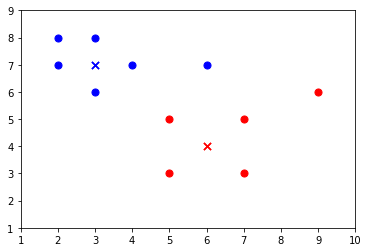

In [144]:
old_data_assignment = assignment(*final_alice_clusters, data_al)

data_presentation(final_alice_clusters[0,0], final_alice_clusters[1,0], old_data_assignment, data_al,     user="Alice", show=False)
data_presentation(final_alice_clusters[0,0], final_alice_clusters[1,0], new_data_assignment, data_al_new, user="Alice")

## Outliers

There is a further recording, coming from another institution, that Alice and Bob would like to process:

In [146]:
lastdata = [{'name': 'Luyten 98-59 d', 'AU':22, 'mass':3, 'albedo':3}]

In [147]:
last_data_framed = pd.DataFrame(lastdata)

Alice and Bob are not certain about the quality of this recording and ask your opinion.

**Use the chosen clustering from above, and plot the new data point together with the old data. What do you think about this observation?**

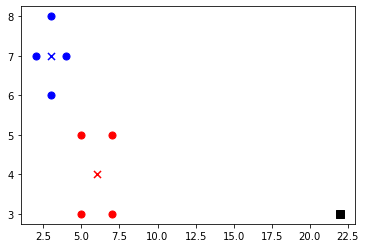

In [151]:
data_presentation(final_alice_clusters[0,0], final_alice_clusters[1,0], old_data_assignment, data_al, user="Alice", show=False)
plt.scatter(last_data_framed.loc[:,['AU']], last_data_framed.loc[:,['albedo']],s=50,c='black',marker='s')
plt.show()

For your own interest, you decide to analyze how this new data point will affect the clustering process.

**Restart from the original data set of eight data points; place the centroids of the two clusters as you computed them for those eight data points; add the new data on Luyten 98-59 d and run two iterations of the k-means algorithm. What happens to the clusters?**

[[ 1.  6.  6.  1.  4.  8.  1.  1. 23.]]
[[11.  6.  4.  9.  6.  4. 11.  9. 13.]]


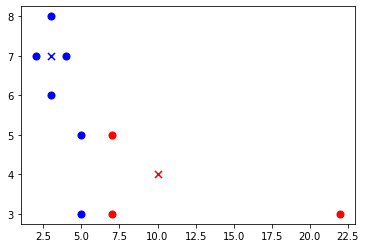

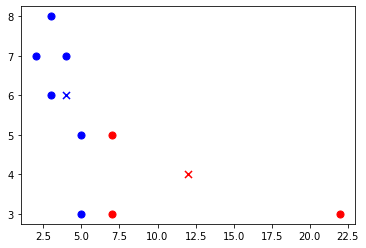

[[ 3.  4.  4.  1.  2.  6.  3.  1. 21.]]
[[13.  8.  6. 11.  8.  6. 13. 11. 11.]]


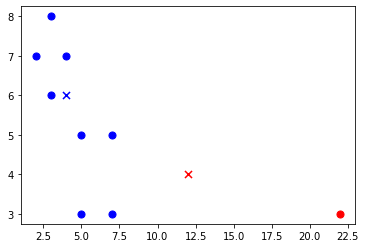

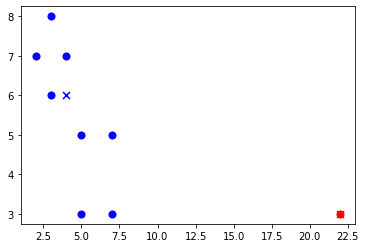

[[ 3.  4.  4.  1.  2.  6.  3.  1. 21.]]
[[24. 17. 17. 22. 19. 15. 24. 22.  0.]]


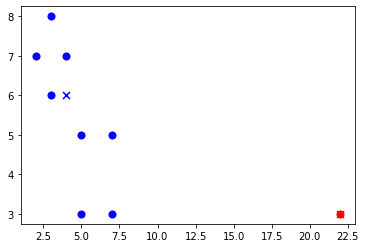

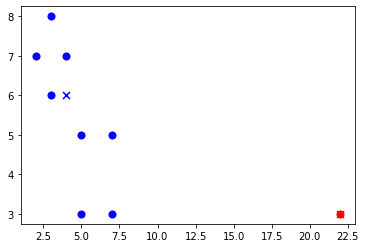

[[ 3.  4.  4.  1.  2.  6.  3.  1. 21.]]
[[24. 17. 17. 22. 19. 15. 24. 22.  0.]]


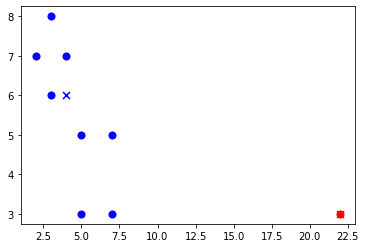

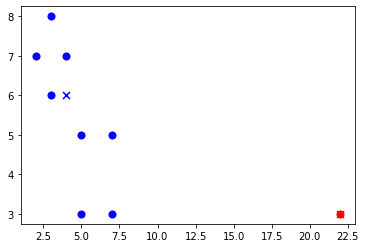

In [157]:
concatenated_data = pd.concat([data_frame, last_data_framed], ignore_index=True)

data_al = concatenated_data.loc[:,['AU','albedo']]

n_runs = 4
for i in range(n_runs):
    assignment_al = assignment(
        blu_clust, 
        red_clust, 
        data_al, 
        verbose=True
    )
    data_presentation(blu_clust, red_clust, assignment_al, data_al, "Alice")
    
    blu_points = data_al[ assignment_al]
    red_points = data_al[~assignment_al]
    blu_clust, red_clust = recomputation(
        blu_points, 
        red_points
    )
    data_presentation(blu_clust, red_clust, assignment_al, data_al, "Alice")

## Rescaling

After discussing with other colleagues at a conference, Alice and Bob became suspicious that the recordings of albedo may be wrong. Following the suggestion of Eve, they are thinking about reducing by half all the recorded values of albedo. They present this possible possible change to you, and ask your opinion. In particular, they are concerned whether this change would affect your results.

**Apply the transformation to the original data. Then run two iterations of k-means with the same initialization used in the beginning of the exercise. What do you observe? Is k-means sensitive to the suggested transformation?**

When halving the observed values of albedo, always round down to the closest integer, e.g. $3.5 \rightarrow 3$.

In [163]:
data_frame_albedo_half = data_frame.copy()
data_frame_albedo_half["albedo"] = (data_frame["albedo"]/2).apply(np.floor)
print(data_frame_albedo_half)

             name  AU  mass  albedo
0     HD 209458 b   2     3     3.0
1     HD 189733 b   5     3     1.0
2     51 Pegasi b   7     2     2.0
3  PSR B1257+12 B   3     5     3.0
4  PSR B1257+12 C   5     4     2.0
5    OGLE-TR-56 b   7     4     1.0
6     Fomalhaut b   3     3     4.0
7        2M1207 b   4     3     3.0


[[2. 3. 4. 1. 2. 5. 2. 2.]]
[[6. 5. 2. 5. 4. 3. 6. 4.]]


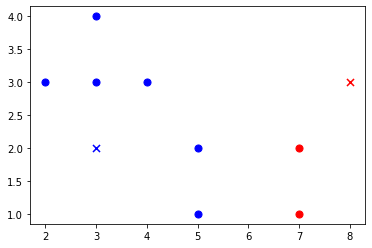

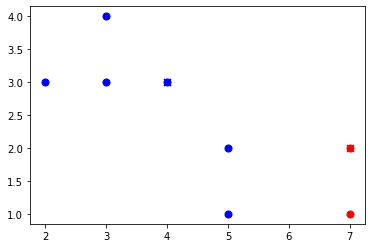

[[2. 3. 4. 1. 2. 5. 2. 0.]]
[[6. 3. 0. 5. 2. 1. 6. 4.]]


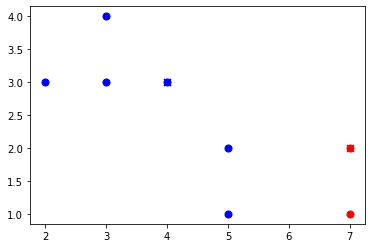

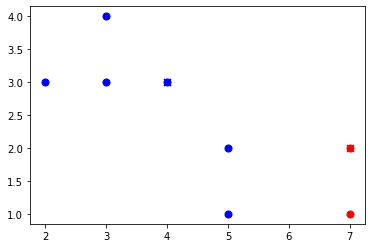

[[2. 3. 4. 1. 2. 5. 2. 0.]]
[[6. 3. 0. 5. 2. 1. 6. 4.]]


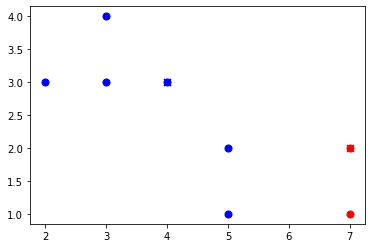

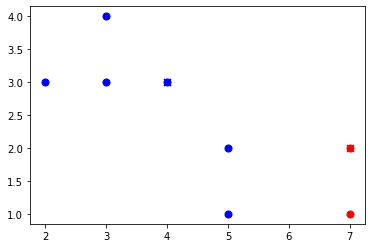

In [176]:
blu_clust = np.array([3, 2])
red_clust = np.array([8, 3])

data_al = data_frame_albedo_half.loc[:,['AU','albedo']]

n_runs = 3
for i in range(n_runs):
    assignment_al = assignment(
        blu_clust, 
        red_clust, 
        data_al, 
        verbose=True
    )
    data_presentation(blu_clust, red_clust, assignment_al, data_al, "Alice")
    
    blu_points = data_al[ assignment_al]
    red_points = data_al[~assignment_al]
    blu_clust, red_clust = recomputation(
        blu_points, 
        red_points
    )
    data_presentation(blu_clust, red_clust, assignment_al, data_al, "Alice")

## PCA

Alice is very happy with the work done so far. However, whenever collecting a new data point, she finds that computing distances from cluster centers in two dimensions is too computationally expensive. She wonders whether you could come up with a single synthetic index to evaluate new data points as they are collected.

You think that a good idea would be to use PCA.

**How would you justify the use of PCA with respect to the assumptions of PCA?**

After explaining to Alice the reasons to use PCA, you proceed to apply the algorithm to project the data in one dimension.

**Plot the original data according to Alice's hypothesis and draw the first eigenvector**

Do not round in PCA.

Hint: You can either use the *scikit-learn* module for PCA (from sklearn.decomposition import PCA) or your PCA implementation from mandatory exercise 3.

In [180]:
from sklearn.decomposition import PCA

data_al = np.array(data_frame.loc[:,["AU", "albedo"]])

pca = PCA(n_components=2)

pca.fit(data_al)
first_eigvec = pca.components_[0]

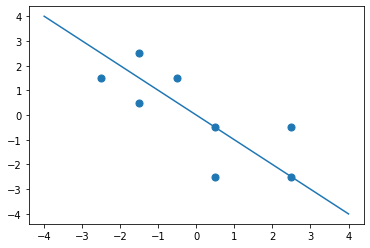

In [181]:
centered_data = data_al - np.mean(data_al, axis=0)
plt.scatter(centered_data[:,0], centered_data[:,1],s=50)

x = np.linspace(-4,4,100)
y = first_eigvec[1]/first_eigvec[0] * x
plt.plot(x,y)

## Autoencoders

Bob has been using standard autoencoders with squared reconstruction loss to compress high-definition images of exoplanets in order to save space. However he has been unhappy with the results, and he has decided to show the original sample \[3\]: 

<img src="original.jpg" width=300 height=300 />

and its reconstruction:

<img src="reconstruction.jpg" width=300 height=300 />

Bob complains that the definition of the exoplanet in the middle of the image is very low. He also explains to you that the exoplanet of interest is always the middle of the picture, while other elements around (such as companions or background stars) are of no interest to him. His computational resources are limited, so, ideally he would prefer not to change the architecture of the autoencoder network by adding more layers or more nodes.

**How would you recommend changing the autoencoder algorithm to address Bob's challenge?**

Consider changing loss calculation so that loss in pixels related to the central exoplanet have a bigger impact

## Notes
\[1\] Exoplanet names are real. All the other details are made up.

\[2\] Example of Manhattan distance:

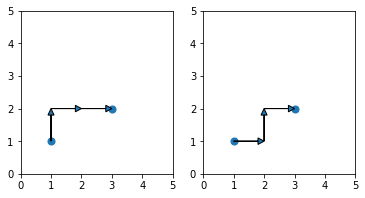

In [182]:
fig,ax = plt.subplots(1,2, figsize=(6,3))

ax[0].set_xlim([0,5])
ax[0].set_ylim([0,5])
ax[0].scatter([1,3],[1,2],s=50)
ax[0].arrow(1,1,0,1,length_includes_head=True,head_width=0.2, head_length=0.2)
ax[0].arrow(1,2,1,0,length_includes_head=True,head_width=0.2, head_length=0.2)
ax[0].arrow(2,2,1,0,length_includes_head=True,head_width=0.2, head_length=0.2)

ax[1].set_xlim([0,5])
ax[1].set_ylim([0,5])
ax[1].scatter([1,3],[1,2],s=50)
ax[1].arrow(1,1,1,0,length_includes_head=True,head_width=0.2, head_length=0.2)
ax[1].arrow(2,1,0,1,length_includes_head=True,head_width=0.2, head_length=0.2)
ax[1].arrow(2,2,1,0,length_includes_head=True,head_width=0.2, head_length=0.2)

The distance between $x=(1,1)$ and $y=(3,2)$ is always $3$ independently from the path.

\[3\] Figure retrieved at [https://www.eso.org/public/images/26a_big-vlt/](https://www.eso.org/public/images/26a_big-vlt/)